In [2]:
# 此处导入显示报错是因为keras为动态加载库，不影响使用
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

/home/zy/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/zy/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## 向量化数据

In [ ]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## 标签向量化有两种方法，一种是one-hot编码，一种是数字编码

## one-hot编码

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

## keras提供了one-hot编码的方法

In [ ]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 构建网络

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 生成训练集和验证集

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## 训练网络

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

## 绘制损失和精度

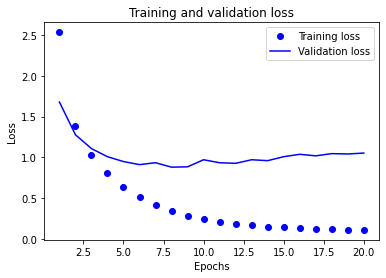

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

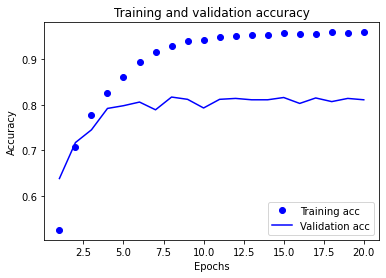

In [14]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 判断过拟合出现位置，重新训练

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
 5/16 [========>.....................] - ETA: 0s - loss: 3.3583 - accuracy: 0.3656

2022-04-23 11:23:45.285526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 22ms/step - loss: 2.5235 - accuracy: 0.5312 - val_loss: 1.6663 - val_accuracy: 0.6480
Epoch 2/9
10/16 [=================>............] - ETA: 0s - loss: 1.4034 - accuracy: 0.7002

2022-04-23 11:23:45.675113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 15ms/step - loss: 1.3677 - accuracy: 0.7075 - val_loss: 1.2834 - val_accuracy: 0.7050
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0120 - accuracy: 0.7791 - val_loss: 1.0897 - val_accuracy: 0.7590
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.7903 - accuracy: 0.8295 - val_loss: 1.0299 - val_accuracy: 0.7660
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6314 - accuracy: 0.8649 - val_loss: 0.9456 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5056 - accuracy: 0.8951 - val_loss: 0.9198 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4099 - accuracy: 0.9161 - val_loss: 0.8789 - val_accuracy: 0.8210
Epoch 8/9
16/16 [==============================] - 0s 15ms/step - loss: 0.3319 - accuracy: 0.9297 - val_loss: 0.8677 - val_accuracy: 0.8290
Epoch 9/9
71/71 [=============

[0.9725333452224731, 0.7876224517822266]

## 结果预测

In [16]:
predictions = model.predict(x_test)

2022-04-23 11:25:13.687268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [17]:
# 共46个类别，判断会返回属于每个类的概率
predictions[0].shape

(46,)

---

## 类别转为整数张量

In [18]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
y_test

## 修改损失函数重新训练

In [20]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

---
## 如果令隐藏层的单元数过小会发生什么

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20


2022-04-23 11:32:05.969895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 15ms/step - loss: 3.5424 - accuracy: 0.1759 - val_loss: 3.2784 - val_accuracy: 0.3920
Epoch 2/20
 6/63 [=>............................] - ETA: 0s - loss: 3.2480 - accuracy: 0.3906

2022-04-23 11:32:07.254142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 12ms/step - loss: 2.9800 - accuracy: 0.3557 - val_loss: 2.8057 - val_accuracy: 0.3040
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 2.4746 - accuracy: 0.3215 - val_loss: 2.3712 - val_accuracy: 0.3270
Epoch 4/20
63/63 [==============================] - 1s 12ms/step - loss: 1.9094 - accuracy: 0.4232 - val_loss: 1.7645 - val_accuracy: 0.6470
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 1.3293 - accuracy: 0.6770 - val_loss: 1.4732 - val_accuracy: 0.6550
Epoch 6/20
63/63 [==============================] - 1s 12ms/step - loss: 1.1574 - accuracy: 0.6917 - val_loss: 1.4582 - val_accuracy: 0.6580
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 1.0725 - accuracy: 0.7071 - val_loss: 1.4714 - val_accuracy: 0.6650
Epoch 8/20
63/63 [==============================] - 1s 12ms/step - loss: 1.0078 - accuracy: 0.7293 - val_loss: 1.5021 - val_accuracy: 0.6600
Epoch 9/20
63/63 [======